The problem with regular Recurrent Neural Networks is that, due to the vanishing gradient problem, they struggle to remember specific information over a period of time. For instance the following sentences

    The cat ate ... and was full
    The cats ate ... and were full
    
might be completely identical, save for the plurality of the subject, and by extension the tense of "was" vs "were"

## Memory Cells

Gated Recurrent Units have this concept of a *memory cell*, `c` that learns and carries information from once layer to the next. The reason we call it **Gated** is because at each step along the way, the cell could potentially accept or ignore carry-over information.

We calculate a layer's *candidate values* using information from the last memory cell as well as this layer's input. We want the values to be between `-1` and `1`, so we use the `tanh()` function.

$\tilde{c}^{\langle t \rangle} = tanh(Wcc^{\langle t-1 \rangle} + Wcx^{\langle t \rangle} + b_c)$

Next, we define the *update gate*, which creates a sort of value-level mask.

$\Gamma_u = \sigma(Wuc^{\langle t-1 \rangle} + Wux^{\langle t \rangle} + b_u)$

Finally, we combine the two, element-wise. Intuitively, this can be interpreted as:

1. "Calculate the *values* that we want to carry over, assuming we're carrying everything over"
2. "Decide *what to carry over* from one step to the next"

$c^{\langle t \rangle} = \Gamma_u * \tilde{c}^{\langle t \rangle} + (1 - \Gamma_u) * c^{\langle t-1 \rangle}$

This should make sense, as the Gamma and 1-minus-Gamma values sum to one. We can interpret this as "keep the first half, forget the second half, which was already in the cell."

## Visually

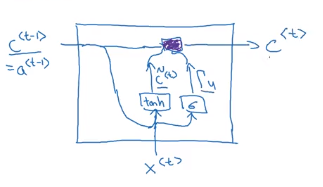

In [1]:
from IPython.display import Image

Image('images/gru.png')

We can also have an output `y_t` at each layer, but this diagram is intended to highlight the memory-construction that happens within each cell.